In [2]:
from utils import *
from preprocessing import *

Get the spatial dimensions of each HSI. This can help decide to what size to resize the images later at data augemntations.

In [33]:
# FX10 camera
IMG_DIR = '../Data/cropped_hdf5'
CAMERA = 'FX10'

# Healthy leaves
DATES = ['07SEPT2023', '08SEPT2023', '09SEPT2023', '10SEPT2023', '11SEPT2023', '12SEPT2023',
         '13SEPT2023', '14SEPT2023', '15SEPT2023', '18SEPT2023', '19SEPT2023']
TRAYS = ['3D', '4C', '4D', '2D']    # Some files from the FX10 camera are mistakenly named in 2D instead of 4D
healthy_FX10 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Early diseased leaves
DATES = ['07SEPT2023']
TRAYS = ['3C']
early_diseased_FX10 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Mid diseased leaves
DATES = ['08SEPT2023', '09SEPT2023']
TRAYS = ['3C']
mid_diseased_FX10 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Late diseased leaves
DATES = ['10SEPT2023', '11SEPT2023', '12SEPT2023', '13SEPT2023', '14SEPT2023', '15SEPT2023']
TRAYS = ['3C']
late_diseased_FX10 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Number of samples in each category
print(f'Healthy: {len(healthy_FX10)}')
print(f'Early diseased: {len(early_diseased_FX10)}')
print(f'Mid diseased: {len(mid_diseased_FX10)}')
print(f'Late diseased: {len(late_diseased_FX10)}')

# Concatenate the lists
FX10_data = healthy_FX10 + early_diseased_FX10 + mid_diseased_FX10 + late_diseased_FX10
print(f'Total number of samples: {len(FX10_data)}')

Healthy: 321
Early diseased: 12
Mid diseased: 25
Late diseased: 30
Total number of samples: 388


In [34]:
# FX17 camera
IMG_DIR = '../Data/cropped_hdf5'
CAMERA = 'FX17'

# Healthy leaves
DATES = ['07SEPT2023', '08SEPT2023', '09SEPT2023', '10SEPT2023', '11SEPT2023', '12SEPT2023',
         '13SEPT2023', '14SEPT2023', '15SEPT2023', '18SEPT2023', '19SEPT2023']
TRAYS = ['3D', '4C', '4D', '2D']    # Some files from the FX17 camera are mistakenly named in 2D instead of 4D
healthy_FX17 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Early diseased leaves
DATES = ['07SEPT2023']
TRAYS = ['3C']
early_diseased_FX17 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Mid diseased leaves
DATES = ['08SEPT2023', '09SEPT2023']
TRAYS = ['3C']
mid_diseased_FX17 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Late diseased leaves
DATES = ['10SEPT2023', '11SEPT2023', '12SEPT2023', '13SEPT2023', '14SEPT2023', '15SEPT2023']
TRAYS = ['3C']
late_diseased_FX17 = filter_filenames(folder_path=IMG_DIR, camera_id=CAMERA, date_stamps=DATES, tray_ids=TRAYS)

# Number of samples in each category
print(f'Healthy: {len(healthy_FX17)}')
print(f'Early diseased: {len(early_diseased_FX17)}')
print(f'Mid diseased: {len(mid_diseased_FX17)}')
print(f'Late diseased: {len(late_diseased_FX17)}')

# Concatenate the lists
FX17_data = healthy_FX17 + early_diseased_FX17 + mid_diseased_FX17 + late_diseased_FX17
print(f'Total number of samples: {len(FX17_data)}')

Healthy: 326
Early diseased: 11
Mid diseased: 20
Late diseased: 33
Total number of samples: 390


In [35]:
def get_hsi_dimensions(filepaths):
    dimensions = {}
    for path in filepaths:
        filetype = path.split('.')[-1]
        with h5py.File(path, 'r') as f:
            if filetype == 'h5':
                hypercube_dataset = 'Hypercube'
            else:
                hypercube_dataset = 'hypercube'

            dataset = f[hypercube_dataset]
            _, height, width = dataset.shape  # Extract spatial dimensions (height, width)

            dimensions[path] = (height, width)  # Store correctly
    
    return dimensions


def plot_hsi_dimensions(dimensions):
    widths = [w for _, w in dimensions.values()]
    heights = [h for h, _ in dimensions.values()]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(widths, heights, color='b', alpha=0.7)
    
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.title("Scatterplot of Hyperspectral Image Dimensions")
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()
    
    
def plot_hsi_histograms(dimensions):
    widths = [w for _, w in dimensions.values()]
    heights = [h for h, _ in dimensions.values()]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two side-by-side histograms

    # Histogram for Widths
    axes[0].hist(widths, bins=10, color='b', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel("Width (pixels)")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Histogram of Image Widths")
    # Histogram for Heights
    axes[1].hist(heights, bins=10, color='g', alpha=0.7, edgecolor='black')
    axes[1].set_xlabel("Height (pixels)")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("Histogram of Image Heights")
    plt.tight_layout()
    plt.show()
    
    
def compute_hsi_stats(dimensions):
    widths = np.array([w for _, w in dimensions.values()])
    heights = np.array([h for h, _ in dimensions.values()])
    
    stats = {
        "Width": {
            "Min": np.min(widths),
            "Max": np.max(widths),
            "Mean": np.mean(widths),
            "Median": np.median(widths),
            "Std Dev": np.std(widths),
        },
        "Height": {
            "Min": np.min(heights),
            "Max": np.max(heights),
            "Mean": np.mean(heights),
            "Median": np.median(heights),
            "Std Dev": np.std(heights),
        }
    }
    
    return stats

In [40]:
spatial_dimensions_FX10 = get_hsi_dimensions(FX10_data)
spatial_dimensions_FX17 = get_hsi_dimensions(FX17_data)

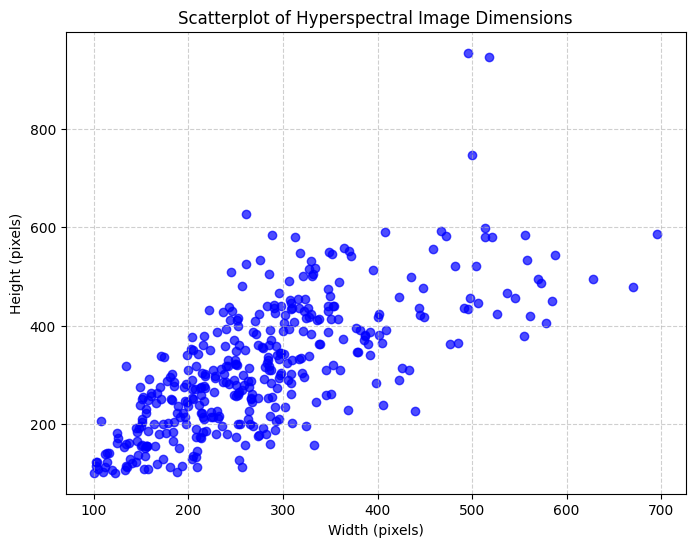

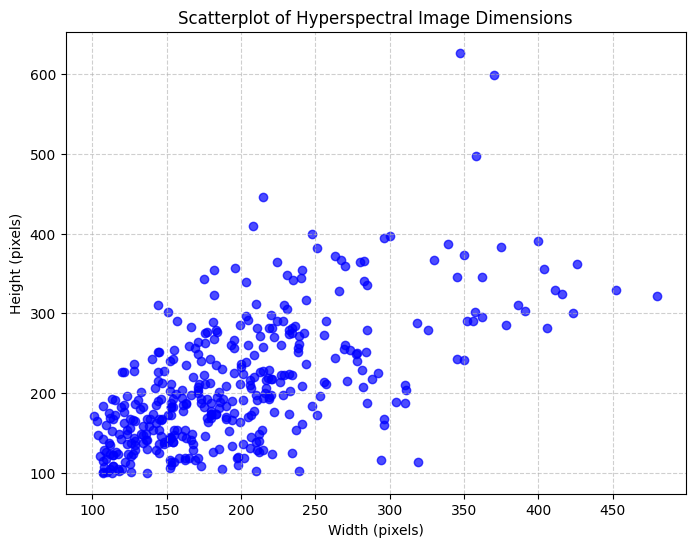

In [41]:
plot_hsi_dimensions(spatial_dimensions_FX10)
plot_hsi_dimensions(spatial_dimensions_FX17)

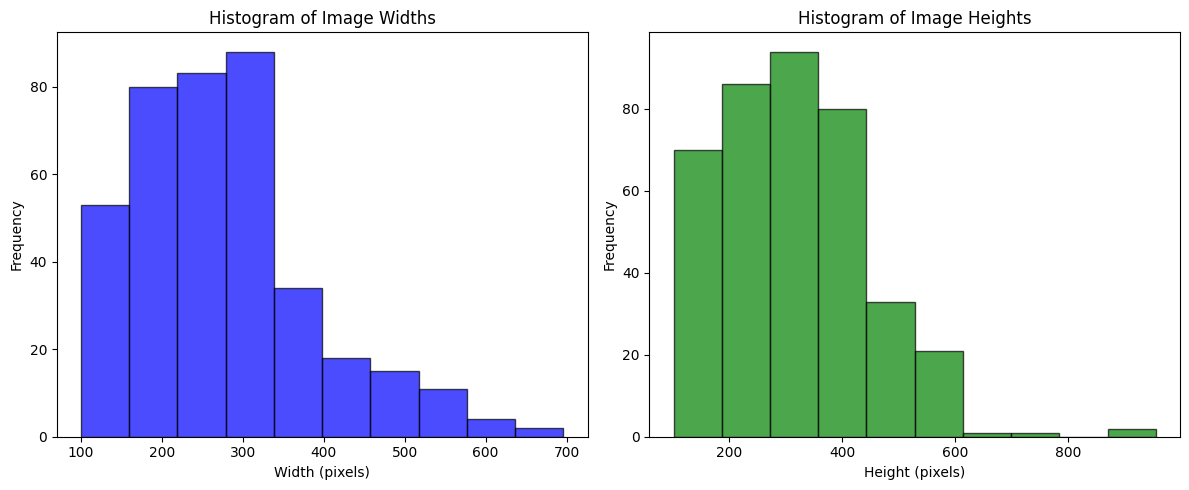

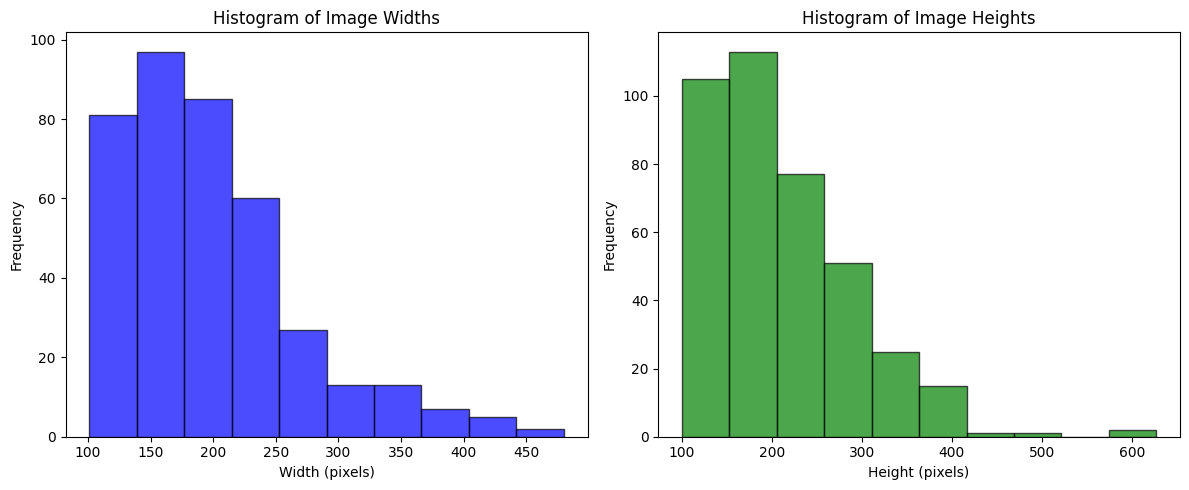

In [43]:
plot_hsi_histograms(spatial_dimensions_FX10)
plot_hsi_histograms(spatial_dimensions_FX17)

In [44]:
stats = compute_hsi_stats(spatial_dimensions_FX10)

# Print results
for key, values in stats.items():
    print(f"\n{key} Statistics:")
    for stat, value in values.items():
        print(f"  {stat}: {value:.2f}")



Width Statistics:
  Min: 100.00
  Max: 696.00
  Mean: 277.27
  Median: 262.00
  Std Dev: 109.83

Height Statistics:
  Min: 101.00
  Max: 955.00
  Mean: 315.34
  Median: 300.50
  Std Dev: 133.01


In [45]:
stats = compute_hsi_stats(spatial_dimensions_FX17)

# Print results
for key, values in stats.items():
    print(f"\n{key} Statistics:")
    for stat, value in values.items():
        print(f"  {stat}: {value:.2f}")



Width Statistics:
  Min: 101.00
  Max: 480.00
  Mean: 197.43
  Median: 182.50
  Std Dev: 71.33

Height Statistics:
  Min: 100.00
  Max: 627.00
  Mean: 209.89
  Median: 192.50
  Std Dev: 80.28


256x256 resize will be good for both FX10 and FX17